# Numerisches Integrieren und Differenzieren

In diesem Kapitel wollen wir uns dem numerischen Integrieren und Differenzieren widmen. Hierbei handelt es
sich um Techniken zur näherungsweisen Berechnung von bestimmten Integralen und Ableitungen. Vorallem
findet dies dann Anwendung, wenn man das Problem analytisch nur schwer lösen kann oder es zu ineffizient
ist, um das Problem analytisch zu lösen.

Zunächst werden wir uns um das Integrieren kümmern und danach um das Differenzieren.

## Numerisches Integrieren

Um eine Intuition zu bekommen, schauen wir uns den 1-D Fall an einem konkreten Beispiel an. Sei also 
unsere Funktion $f: \mathbb{R} \rightarrow \mathbb{R}$:

$$ f(x) := x^2$$

Visualisieren wir uns die Funktion.

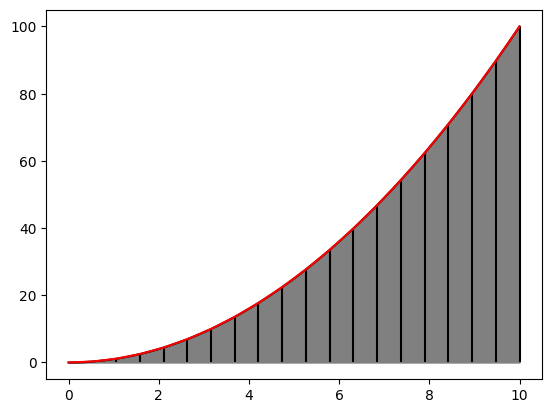

In [2]:
# importieren der benötigten Bibliotheken
import matplotlib.pyplot as plt
import numpy as np

# Grenzen der Integration
a = 0
b = 10

# anlegen der x-Werte in unterschiedlicher 
# Auflösung
ab = np.linspace(a, b, 1000)
vlines = np.linspace(a,b,20)

# wir berechnen die Funktion f(x) = x^2
fv = [x**2 for x in vlines]
fx = [x**2 for x in ab]

# plotten der Funktion
plt.plot(ab, fx, color='black')
plt.fill_between(ab, fx, color='grey')
plt.vlines(vlines, 0, fv, color="black")
plt.plot(vlines, fv, color="red")
plt.show()

Wie immer ist das Ziel beim Integrieren einer Funktion die Fläche unter dem Graph (möglichst genau) zu
berechnen. Und dies ist natürlich auch unser Ziel beim numerischen Integrieren.

Wie man hier gut erkennen kann, ist es möglich eine Funktion mit linearen Abschnitten zu approximieren
(die roten Abschnitte sind die linearen Approximationen). Man bekommt damit also eine (mehr oder weniger) 
gute Representierung durch Trapeze. Somit kann man dann die Fläche unter der Funktion approximieren 
mit der Formel:

$$
\int\limits_a^b f(x) dx \approx \sum_a^b \frac{f(x) + f(x+\Delta x)}{2} \cdot \Delta x
$$

Damit haben wir eine Berechnungsformel zur approximativen Berechnung des Integrals einer Funktion. 
Und diese Formel können wir auch direkt schon in Python übersetzen! Dies sieht wie folgt aus:

In [3]:
# die Grenzen
a = 0
b = 10

# f(x) := x^2
def f(x):
    return x**2

# die Schrittweite der Funktion, also das Delta x
dx = (b - a)/1000

# die x Werte
x_vals = np.arange(a, b, dx)

# das berechnete Integral
Fab = 0

# die Hauptschleife
for x in x_vals:
    # linke Seite des Trapezes
    fx = f(x)
    # rechte Seite des Trapezes
    fdx = f(x+dx)
    # die Fläche des Trapezes wird zur Gesamtfläche addiert
    Fab += (fx + fdx) / 2 * dx

print(Fab)

# analytische Lösung
Fab = 1/3 * 10**3 - 1/3 * 0**3
Fab

333.3335000000001


333.3333333333333

Wir sehen also, dass wir mit dieser (ziemlich einfachen) Berechnungsmethode sehr nahe an die 
tatsächliche Lösung kommen (Größenordnung $10^{-4}$)! Natürlich hängt die Qualität des Ergebnisses signifikant von der Wahl
des $\Delta x$ ab. Wählen wir dieses zu groß, approximieren wir die Funktion über einen relative 
großen Bereich und damit reduziert sich auch die Genauigkeit ziemlich drastig. Als Daumenregel kann
man hier sagen, dass man $\Delta x$ lieber ein wenig kleiner wählt als zu groß. Bei den heutigen 
Prozessoren merkt in aller Regel auch keinen Unterschied, ob man die Funktion in 100 Bereiche 
oder in 1000 diskretisiert. Leider kann man aber die Genauigkeit nicht unendlich verbessern, da man in einem Computer
nur endlich kleine Werte darstellen kann. Aber Schrittweiten von 0.01 sind auf jeden Fall nicht zu klein und in aller
Regel auch nicht zu groß.

``````{admonition} Intuition numerische Integration
:class: tip, dropdown
Der Algorithmus zur Berechnung des numerischen Integrals ist im Endeffekt eine direkte Anwendung des 
Riemann Integrals, welches auch schon aus der Schule bekannt sein sollte. Denn prinzipiell ist das
Riemann Integral nichts anderes als eine unedliche Summe von Rechtecken, welche infinitisimal breit
sind. Da wir aber in einem Computer nur endliche Genauigkeit haben, müssen wir die Rechtecke (oder
hier Trapeze) breiter machen und bekommen damit nur eine (mehr oder weniger genaue) Approximation.

Dies ist dann auch der Grund, weshalb wir ein genaueres Ergebnis bekommen, wenn wir den Bereich in
viele kleine Bereiche unterteilen.
``````

## Numerisches Differenzieren

### Ableitungen 1. Ordnung

Schauen wir uns eine Definition der Ableitung an, die ein wenig anders aussieht als die, die aus der 
Schule bereits bekannt sein sollte:

$$
f'(x) := \frac{f(x+h) - f(x-h)}{2h}; \;h \rightarrow 0
$$

Diese Formel kann man jetzt auch schon direkt wieder nutzen, um die Ableitung numerisch in einem Punkt zu berechenen.
In Python Code sieht das dann wie folgt aus:

In [4]:
# unser Punkt
x = 5

# unsere Funktion
def f(x):
    return x**2

# unser h
h = 1e-6

# die numerische Ableitung
df = (f(x+h) - f(x-h)) / (2*h)

print(df)

# die analytische Lösung
df = 2*x
df

10.00000000139778


10

``````{admonition} $h$ vs $2h$
:class: tip
Man benutzt bei der numerischen Differentation $2h$ und die damit resultierenden Verschiebungen in 
x-Richtung, weil man dadurch einen quadratischen Fehler in $h$ bekommt. Benutzt man aber die herkömmliche Definition,
so erhält man einen Fehler in $O(h)$, was für ein $h<1$ in einem größeren Fehler resultiert, als die von uns 
benutzte Methode. Interessierte können [hier](https://de.wikipedia.org/wiki/Numerische_Differentiation) und [hier](http://www.tm-mathe.de/Themen/html/funnumdiff.html) mehr über das Thema erfahren. Selbstverständlich ist dies aber nicht für die
Klausur relevant.
``````

Möchte man Ableitung der Funktion über ein komplettes Intervall $[a,b]$ berechenen, so können wir obigen Code
ganz leicht erweitern um eine Schleife über das komplette Intervall, anstelle eines einzigen Punktes. Konkret
sieht dies dann ganz ähnlich zur Integration aus:

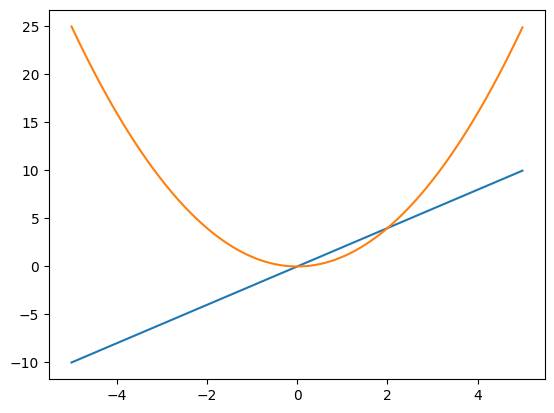

In [7]:
# unser Intervall
a = -5
b = 5

# wir diskretisieren die Funktion wieder in 
# 1000 Bereiche
dx = (b - a)/1000

# die x Werte
x_vals = np.arange(a, b, dx)

# unsere Funktion
def f(x):
    return x**2

# unser h
h = 1e-6

# die numerische Ableitung
def df(x):
    return (f(x+h) - f(x-h)) / (2*h)

# Berechnung der Funktionswerte (nur zur Visualisierung)
f_vals = [f(x) for x in x_vals]
# Berechnung der Ableitungen an allen Punkten
df_vals = [df(x) for x in x_vals]

# schauen wir uns die Ableitung an
plt.plot(x_vals, df_vals)
plt.plot(x_vals, f_vals)
plt.show()

Wie man leicht sieht, entspricht das Ergebnis exakt unseren Erwartungen. 

### Ableitungen höherer Ordnung

Wenn wir im späteren Verlauf der Vorlesung Kurvendiskussionen besprechen möchten, brauchen wir natürlich auch Ableitungen
höherer Ordnung. Für unsere Anwendungen reichen Ableitung 2. Ordnung völlig aus, weswegen wir Ableitungen höherer Ordnung
nicht betrachten werden. Für die Ableitung 2. Ordnung erhalten wir dann:

$$
f''(x) \approx \frac{f(x+h) + f(x-h) - 2f(x)}{h^2}; \; h \rightarrow 0
$$

Diese Formel erhält man, indem man um den Punkt $x$ zwei Taylor-Entwicklungen durchführt. Dies sieht wie folgt aus:

$$
f(x+h) = f(x) + hf'(x) + \frac{h^2 f''(x)}{2} + \frac{h^3f'''(x)}{6} + O(h^4) \\
f(x-h) = f(x) -  hf'(x) + \frac{h^2 f''(x)}{2} - \frac{h^3f'''(x)}{6} + O(h^4) \\
$$

Addiert man diese beiden Gleichungen zusammen, so erhält man:

$$
f(x+h) + f(x-h) = 2f(x) + h^2 f''(x) + O(h^4)
$$

Stellen wir diese Gleichung nach $f''(x)$ um, so erhalten wir:


$$
f''(x) = \frac{f(x+h) + f(x-h) - 2f(x)}{h^2} + O(h^4)
$$

Da $h\rightarrow 0$, bekommen wir mit einem Fehler der Größenordnung von $O(h^4)$ eine gut Approximation. Die konkrete
Implementierung ist genau analog zur obigen Implementierung und wird deshalb dem Leser überlassen.